In [4]:
import warnings
from collections import namedtuple
from math import ceil

warnings.simplefilter(action="ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import argparse
from algorithms.snn import SNN
from algorithms.snn_biclustering import SNNBiclustering
from algorithms.fill_tensor_ALS import ALS
from sklearn.metrics import r2_score
import time
import matplotlib.pyplot as plt
from synthetic_data_generation.generate_eval import (
    sales_data_staggering_assignment,
    sales_data_si_assignment,
    sales_data_random_assignment,
    get_sales_data,
)


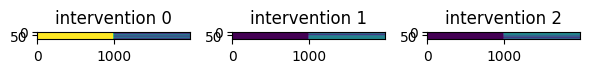

In [15]:
# generate data

## to generate data, first choose the data generator "get_sales_data", and choose seed, N(number of stores), and T (number of timesteps)
N = 100
T = 2000
data = get_sales_data(seed=0, N=N, T=T)
## generate full data
tensor, full_df = data.generate([0, T - 1])


# choose assignment pattern, i.e., SI which correspond to the sparsity pattern considered in the Synthetic intervention paper
data_assignment =  sales_data_si_assignment
periods = data_assignment(data, seed=0, T=data.max_timesteps)
_, df = data.auto_subsample(periods, tensor, full_df)

mask = data.mask
mask = mask.astype(bool)

# plot the tensor under the three interventions (the number 3 is chosen in the get_sales_data function)
fig, axes = plt.subplots(1,3, figsize = (6,10))
for i in range(3):
        axes[ i].imshow(mask[:,:,i,0])
        axes[ i].set_title(f"intervention {i}")
plt.tight_layout()

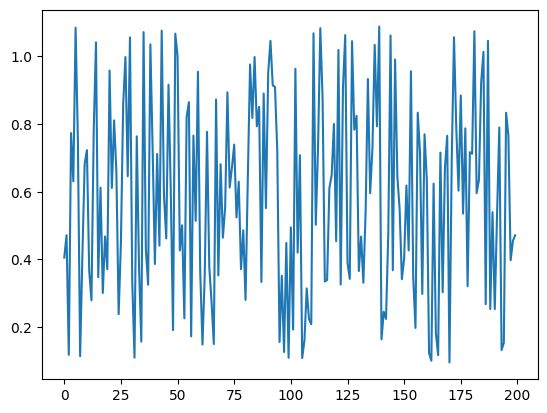

In [18]:
plt.plot(data.factors[1][:200,0])

In [20]:
1/data.time_factor_periods

array([40.6196193 ,  8.41838642])